In [3]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o shapefile de RJ

In [4]:
gdf = gpd.read_file('Shapes/RJ/33SEE250GC_SIR.shp')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 28318 entries, 0 to 28317
Data columns (total 14 columns):
ID            28318 non-null int64
CD_GEOCODI    28318 non-null object
TIPO          28318 non-null object
CD_GEOCODB    21179 non-null object
NM_BAIRRO     21179 non-null object
CD_GEOCODS    28318 non-null object
NM_SUBDIST    14550 non-null object
CD_GEOCODD    28318 non-null object
NM_DISTRIT    28318 non-null object
CD_GEOCODM    28318 non-null object
NM_MUNICIP    28318 non-null object
NM_MICRO      28318 non-null object
NM_MESO       28318 non-null object
geometry      28318 non-null object
dtypes: int64(1), object(13)
memory usage: 3.0+ MB


In [3]:
gdf.sort_values('CD_GEOCODI',inplace = True)

# Importando os resultados do universo  para RJ

In [4]:
dados = pd.read_csv('Planilhas/RJ/CSV/Basico_RJ.csv',sep =';')

In [5]:
dados.rename(columns={'Cod_setor':'CD_GEOCODI'}, inplace=True)
dados.shape

(27769, 13)

In [6]:
dados.head()

,CD_GEOCODI,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,330010005000001,156.0,409.0,"2,62","1,94","2356,8","5716056,06","2571,06","5684616,94","1565,37","4344465,56","2192,65","4711305,89"
1,330010005000002,57.0,143.0,"2,51","1,5","2040,47","3020377,79","2236,67","2869054,77","1816,69","20052928,88","2375,67","24942113,99"
2,330010005000003,343.0,1055.0,"3,08","2,19","2687,8","8362007,52","2836,66","8402987,99","1593,37","7250920,66","2294,84","8835722,1"
3,330010005000004,72.0,219.0,"3,04","3,25","3026,67","24807309,86","3352,62","26410753,99","1865,52","10994097,59","2574,41","13362652,63"
4,330010005000005,212.0,709.0,"3,34","1,94","1124,82","712447,24","1229,19","649944,69","689,4","583588,5","1028,21","521878,03"


# Fazendo um merge entre o geodataframe e o dataframe de dados do universo

In [7]:
gdf['CD_GEOCODI']= pd.to_numeric(gdf['CD_GEOCODI'])

In [8]:
rj = pd.merge(gdf,dados, on='CD_GEOCODI')

In [9]:
rj.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 27769 entries, 0 to 27768
Data columns (total 26 columns):
ID            27769 non-null int64
CD_GEOCODI    27769 non-null int64
TIPO          27769 non-null object
CD_GEOCODB    20752 non-null object
NM_BAIRRO     20752 non-null object
CD_GEOCODS    27769 non-null object
NM_SUBDIST    14221 non-null object
CD_GEOCODD    27769 non-null object
NM_DISTRIT    27769 non-null object
CD_GEOCODM    27769 non-null object
NM_MUNICIP    27769 non-null object
NM_MICRO      27769 non-null object
NM_MESO       27769 non-null object
geometry      27769 non-null object
V001          27685 non-null float64
V002          27685 non-null float64
V003          27685 non-null object
V004          27685 non-null object
V005          27685 non-null object
V006          27685 non-null object
V007          27677 non-null object
V008          27677 non-null object
V009          27768 non-null object
V010          27768 non-null object
V011          27736

In [10]:
del gdf
del dados

Text(0.5,1,'RIO de JANEIRO - RJ')

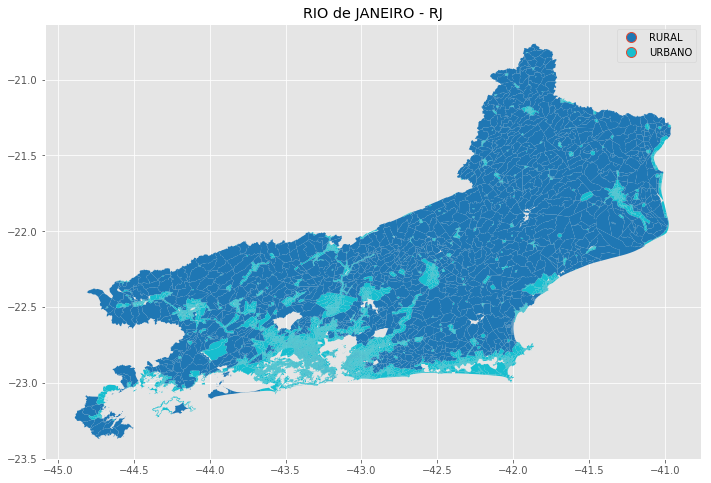

In [12]:
plt.style.use('ggplot')
rj.plot(column = 'TIPO',figsize = (17,8),legend = True)
plt.title('RIO de JANEIRO - RJ')

# Utilizando a projeção de Albers para calcular as áreas

In [11]:
rj['AREA'] = rj.to_crs({'proj': 'aea'}).geometry.area/10**6

# Importando as regiões urbanas definidas pelo estudo da EMBRAPA em 2015

In [12]:
areas_urbanas_br_15 = gpd.read_file('Embrapa/areas_urbanas_br_15.shp')

In [13]:
areas_urbanas_br_15['Area'] = areas_urbanas_br_15.to_crs({'proj': 'aea'}).geometry.area/10**6

In [14]:
areas_urbanas_rj_15 = areas_urbanas_br_15[areas_urbanas_br_15['UF']=='RJ']
del areas_urbanas_br_15

In [15]:
areas_urbanas_rj_15.head()

,Municipio,UF,Area_Urb,Geocodigo,geometry,Area
1911,Angra dos Reis,RJ,65.800,3300100.0,(POLYGON ((-44.34239384180492 -23.176403941340...,65.799611
1912,AperibÃ©,RJ,5.978,3300159.0,(POLYGON ((-42.09133375558115 -21.663803082327...,5.977757
1913,Araruama,RJ,114.636,3300209.0,(POLYGON ((-42.37775046371124 -22.907846068080...,114.634387
1914,Arraial do Cabo,RJ,11.443,3300258.0,(POLYGON ((-42.03837444833622 -22.956057623301...,11.441927
1915,Areal,RJ,5.563,3300225.0,(POLYGON ((-43.11385460032123 -22.222203666395...,5.563289


In [16]:
areas_urbanas_rj_15.rename(columns={'Geocodigo':'CD_GEOCODM'}, inplace=True)
areas_urbanas_rj_15['CD_GEOCODM']=areas_urbanas_rj_15['CD_GEOCODM'].apply(lambda x: int(x))
areas_urbanas_rj_15.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 92 entries, 1911 to 2029
Data columns (total 6 columns):
Municipio     92 non-null object
UF            92 non-null object
Area_Urb      92 non-null float64
CD_GEOCODM    92 non-null int64
geometry      92 non-null object
Area          92 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.0+ KB


In [17]:
rj.fillna('0',inplace = True)

# Visualizando as distribuições de Moradias, Moradores e área 

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Nº de Moradias no SC')

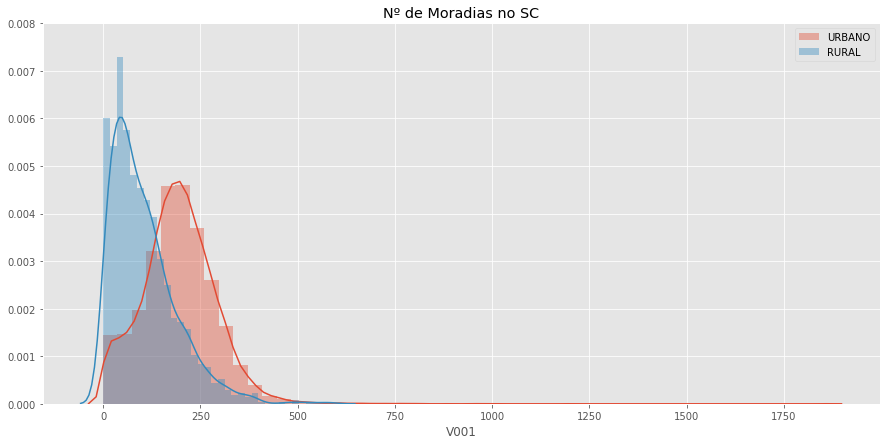

In [20]:
plt.style.use('ggplot')
rj['V001'] = pd.to_numeric(rj['V001'])
rj['V002'] = pd.to_numeric(rj['V002'])
fig = plt.figure(figsize = (15,7))
sns.distplot(rj[rj['TIPO'] =='URBANO']['V001'])
sns.distplot(rj[rj['TIPO']=='RURAL']['V001'])
plt.legend(['URBANO','RURAL'])
plt.ylim((0,0.008))
plt.title('Nº de Moradias no SC')

## Descrição do Número de Moradias por setor censitários urbanos e rurais

In [21]:
print('RURAL','\n',rj[rj['TIPO']=='RURAL']['V001'].describe())
print('URBANO','\n',rj[rj['TIPO']=='URBANO']['V001'].describe())

RURAL 
 count    1572.000000
mean      104.124682
std        83.598665
min         0.000000
25%        43.000000
50%        85.000000
75%       146.000000
max       590.000000
Name: V001, dtype: float64
URBANO 
 count    26197.000000
mean       193.889644
std         94.816123
min          0.000000
25%        134.000000
50%        192.000000
75%        251.000000
max       1861.000000
Name: V001, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.05)

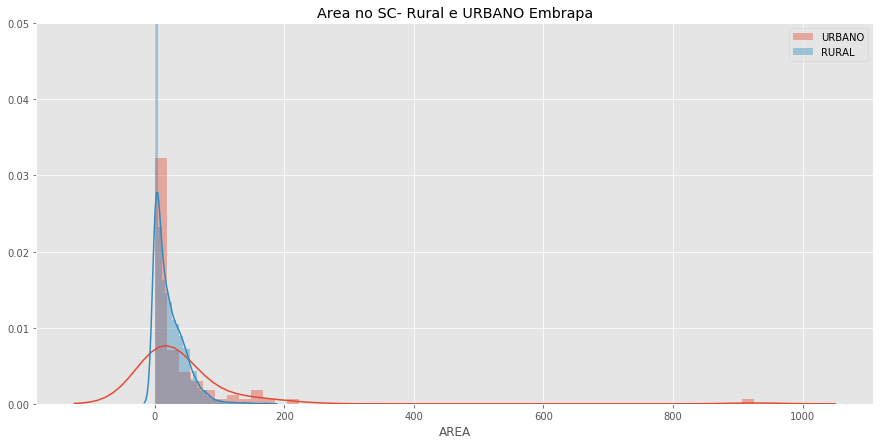

In [22]:
fig = plt.figure(figsize = (15,7))

sns.distplot(areas_urbanas_rj_15['Area'])
plt.legend(['URBANO'])
sns.distplot(rj[rj['TIPO']=='RURAL']['AREA'])
plt.legend(['URBANO','RURAL'])
plt.title('Area no SC- Rural e URBANO Embrapa')
plt.ylim((0,0.05))

In [25]:
rj['V001']= pd.to_numeric(rj['V001'])
rj['V002']= pd.to_numeric(rj['V002'])

In [26]:
rj['Densidade Moradias'] = rj.V001/rj.AREA

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Densidade de moradias')

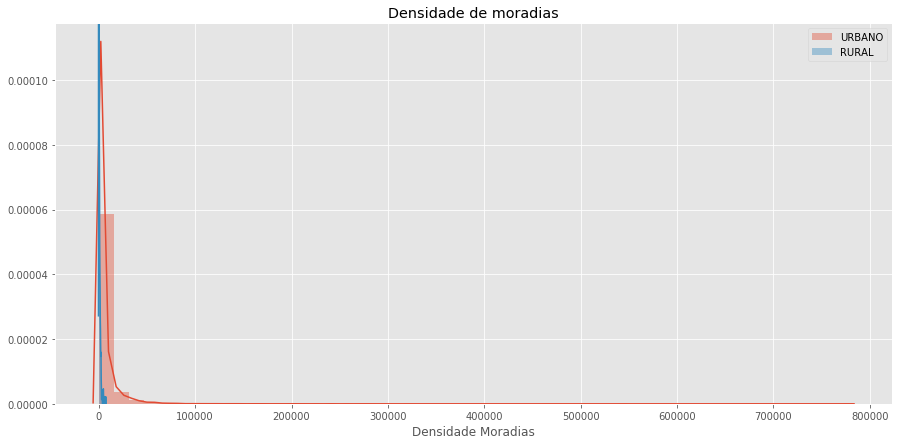

In [31]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (15,7))

sns.distplot(rj[rj['TIPO']=='URBANO']['Densidade Moradias'])
sns.distplot(rj[rj['TIPO']=='RURAL']['Densidade Moradias'])
plt.legend(['URBANO','RURAL'])
plt.title('Densidade de moradias')
#plt.ylim((0,0.05))

In [32]:
print('RURAL','\n',rj[rj['TIPO']=='RURAL']['Densidade Moradias'].describe())
print('URBANO','\n',rj[rj['TIPO']=='URBANO']['Densidade Moradias'].describe())

RURAL 
 count    1572.000000
mean      139.462143
std       495.430420
min         0.000000
25%         2.026735
50%         4.930376
75%        21.566021
max      7177.603679
Name: Densidade Moradias, dtype: float64
URBANO 
 count     26197.000000
mean       6389.719348
std       15027.891269
min           0.000000
25%        1296.465020
50%        3253.863641
75%        5861.338200
max      777707.187010
Name: Densidade Moradias, dtype: float64


In [173]:
rj[(rj['TIPO']=='RURAL')&(rj['Densidade Moradias']>rj['Densidade Moradias'].quantile(q=0.5))].describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,9.000000,9.000000e+00,9.000000,9.000000,9.000000,9.000000
mean,61208.111111,3.304051e+14,212.666667,656.666667,0.047745,4619.905776
std,8464.803091,1.431657e+11,66.560123,227.293863,0.017858,1264.541023
min,46495.000000,3.300704e+14,58.000000,134.000000,0.018466,3140.941098
25%,54725.000000,3.303609e+14,217.000000,587.000000,0.043846,3506.512697
50%,67075.000000,3.304706e+14,226.000000,720.000000,0.047970,4693.792534
75%,67077.000000,3.304706e+14,249.000000,765.000000,0.061885,4949.894577
max,71251.000000,3.305802e+14,289.000000,908.000000,0.070308,7177.603679


## Descrição da área por setor censitários urbanos e rurais

In [23]:
print('URBANO','\n',areas_urbanas_rj_15['Area'].describe())
print('RURAL','\n',rj[rj['TIPO']=='RURAL']['AREA'].describe())

URBANO 
 count     92.000000
mean      42.931441
std      103.609576
min        0.980213
25%        5.208338
50%       13.650985
75%       44.364009
max      925.337323
Name: Area, dtype: float64
RURAL 
 count    1572.000000
mean       22.177167
std        23.344629
min         0.009547
25%         3.220567
50%        14.964143
75%        35.282416
max       172.303648
Name: AREA, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.003)

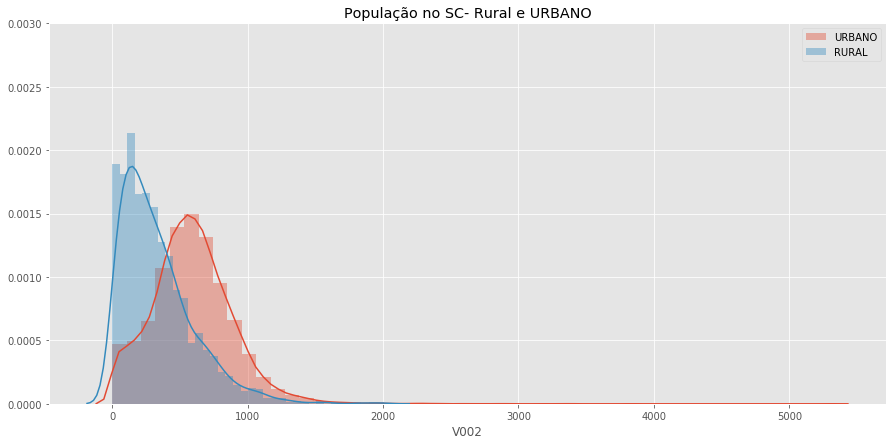

In [24]:
fig = plt.figure(figsize = (15,7))

sns.distplot(rj[rj['TIPO']=='URBANO']['V002'])
plt.legend(['URBANO'])
sns.distplot(rj[rj['TIPO']=='RURAL']['V002'])
plt.legend(['URBANO','RURAL'])
plt.title('População no SC- Rural e URBANO')
plt.ylim((0,0.003))

## Descrição do Número de moradores por setor censitários urbanos e rurais

In [25]:
print('RURAL','\n',rj[rj['TIPO']=='RURAL']['V002'].describe())
print('URBANO','\n',rj[rj['TIPO']=='URBANO']['V002'].describe())

RURAL 
 count    1572.000000
mean      332.483461
std       270.437313
min         0.000000
25%       133.750000
50%       270.000000
75%       459.000000
max      2008.000000
Name: V002, dtype: float64
URBANO 
 count    26197.000000
mean       587.902279
std        300.775700
min          0.000000
25%        397.000000
50%        574.000000
75%        761.000000
max       5315.000000
Name: V002, dtype: float64


# Definindo os limites para filtrar os setores censitários 

In [180]:
max_area = areas_urbanas_rj_15['AREA'].mean() 
min_pop =  rj[rj['TIPO']=='URBANO']['V002'].mean()
min_mor =  rj[rj['TIPO']=='URBANO']['V001'].mean()
min_densidade_moradias = rj[rj['TIPO']=='URBANO']['Densidade Moradias'].quantile(q = 0.25)

In [184]:
scrcu = rj[(rj.TIPO=='RURAL')&(rj.V001 >= min_mor)&(rj.AREA <= max_area)&(rj.V002>= min_pop)\
           &(rj['Densidade Moradias']>= min_densidade_moradias)]

In [185]:
scrcu.describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,14.000000,1.400000e+01,14.000000,14.000000,14.000000,14.000000
mean,57544.285714,3.303219e+14,263.142857,860.857143,0.112907,2870.785761
std,10025.064277,1.908904e+11,104.946768,362.656196,0.067160,1345.558223
min,46494.000000,3.300704e+14,195.000000,596.000000,0.046231,1406.941717
25%,47616.250000,3.301306e+14,212.500000,701.000000,0.063135,1700.949253
50%,55361.000000,3.303906e+14,223.500000,740.500000,0.088846,2308.260047
75%,67076.750000,3.304706e+14,251.750000,825.500000,0.145952,4117.213102
max,70820.000000,3.305554e+14,590.000000,2008.000000,0.254531,4949.894577


Text(0.5,1,'SCRCU - Por Município')

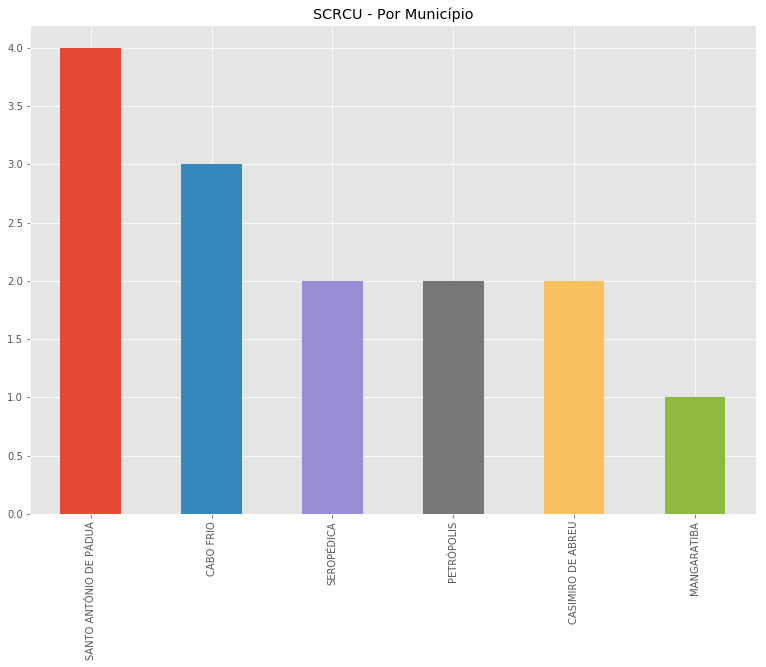

In [186]:
plt.style.use('ggplot')
scrcu.NM_MUNICIP.value_counts().plot.bar(figsize = (13,9))
plt.title('SCRCU - Por Município')

# Visualizando as areas urbanas no estado de RJ - Sobrepondo scrcu e as regioes urbanas definidas pelo estudo da embrapa

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


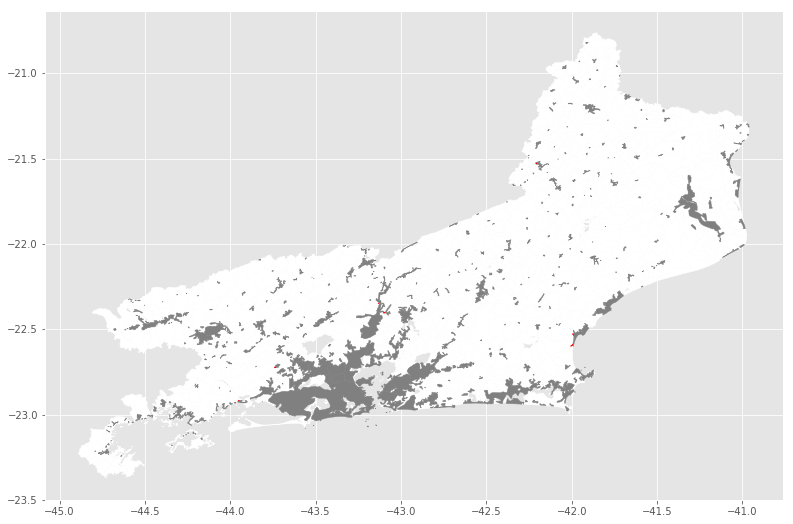

In [187]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,9))
ax.set_aspect('equal')
rj.plot(ax=ax, color='white', edgecolor='white')
areas_urbanas_rj_15.plot(ax=ax, color='gray', edgecolor='gray')
scrcu.plot(ax=ax,column = 'CD_GEOCODI',color = 'red',edgecolor='red')

In [188]:
areas_urbanas_rj_15.rename(columns={'Area':'AREA'},inplace = True)

In [189]:
fonte = np.zeros(areas_urbanas_rj_15.shape[0])
areas_urbanas_rj_15['FONTE'] = fonte

In [190]:
fonte_1 = np.zeros(scrcu.shape[0])+1
scrcu['FONTE'] = fonte_1

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [191]:
regioes_urbanas_rj = scrcu[['geometry','FONTE']].append(areas_urbanas_rj_15[['geometry','FONTE']])

In [192]:
regioes_urbanas_rj.head()

,geometry,FONTE
2674,POLYGON ((-41.99953329438429 -22.5975060673748...,1.0
2675,"POLYGON ((-41.999980340758 -22.5973873601458, ...",1.0
2676,POLYGON ((-42.00228376614119 -22.5997943386438...,1.0
3766,"POLYGON ((-41.989113486066 -22.53600395705369,...",1.0
3767,"POLYGON ((-41.992076110293 -22.5323688601261, ...",1.0


In [193]:
def fonte(x):
    if x == 0:
        return 'EMBRAPA'
    return 'ALAN'
regioes_urbanas_rj['FONTE'] = regioes_urbanas_rj['FONTE'].apply(fonte) 

In [194]:
regioes_urbanas_rj.to_file(driver = 'ESRI Shapefile',filename ='regioes_urbanas_rj.shp')

In [198]:
import mplleaflet
f, ax = plt.subplots(1,figsize = (15,7))
regioes_urbanas_rj[regioes_urbanas_rj['FONTE']=='ALAN'].plot(ax=ax,color = 'red',edgecolor='black')
regioes_urbanas_rj[regioes_urbanas_rj['FONTE']=='EMBRAPA'].plot(ax=ax,color = 'purple',edgecolor='gray')

mplleaflet.display(fig=f,crs=regioes_urbanas_rj.crs)

In [196]:
mplleaflet.show(fig=f,crs=regioes_urbanas_rj.crs)